error passed on epoch  503


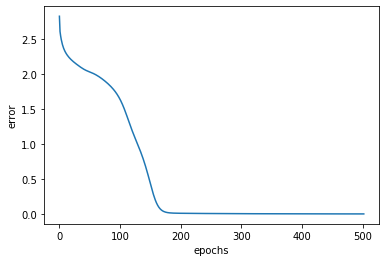


-----Printing final outputs compared to expected outputs for each test data-----

Test data  0: produced: [0.99829653]   [-0.00163857] expected 1   0
Test data  1: produced: [-0.00469118]   [0.99069539] expected 0   1
Test data  2: produced: [-0.00588296]   [0.99471798] expected 0   1
Test data  3: produced: [1.01634861]   [0.00425382] expected 1   0
Test data  4: produced: [0.00735603]   [1.00587325] expected 0   1
Test data  5: produced: [1.02239244]   [0.00763968] expected 1   0
Test data  6: produced: [1.01718404]   [0.02341774] expected 1   0
Test data  7: produced: [0.9975934]   [-0.00417307] expected 1   0

-----Printing final weights and bias - bias is the last term in each array-----

Weights and bias for neuron 1 hidden layer 1:
 [[ 1.06319877]
 [ 1.02353675]
 [ 1.13419534]
 [-1.25484964]]
Weights and bias for neuron 2 hidden layer 1:
 [[ 0.85400759]
 [ 0.9107342 ]
 [ 0.94501433]
 [-0.70808169]]
Weights and bias for neuron 3 hidden layer 1:
 [[0.38828396]
 [0.34077639]
 [0.1

In [20]:
###### %matplotlib inline

# libs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import sys

# # nonlinear, with built in derive param if need diriv.    
def tanh(x, derive=False):
    if derive:
        return (1.0 - x*x)
    return ( (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) )

def sigmoid(x, derive=False):
    if derive:
        return x * (1.0 - x) 

    if (x < 0):
        a = np.exp(x) 
        return (a / (1 + a))
        
    else:
        return ( 1.0 / (1.0 + np.exp(-x)) )

# data set (inputs)
# I added 1 as the last input param to account for the bias
X = np.array([
    [0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 0.0, 1.0],
    [1.0, 0.0, 1.0, 1.0],
    [1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 1.0, 1.0]
]) 

# labels (desired outputs)
y = np.array([[1,0], 
              [0,1], 
              [0,1],
              [1,0],
              [0,1],
              [1,0],
              [1,0],
              [1,0]
])


# weights and biases
# the bias is built in to each neuron's weight vector as the last value 
# (bias should always be dot with 1, effectively just adding)

#hidden layer 1
n1_w = np.array([[0.1], [0.2], [0.3], [0.2]])
n2_w = np.array([[0.1], [0.1], [0.1], [0.1]])
n3_w = np.array([[0.3], [0.3], [0.3], [0.9]])
                 
#hidden layer 2
n4_w = np.array([[0.0], [0.0], [0.0], [0.0]])
n5_w = np.array([[0.1], [0.1], [0.1], [0.2]])
n6_w = np.array([[0.1], [0.1], [0.1], [0.0]])
n7_w = np.array([[0.2], [0.2], [0.2], [-0.1]])
                 
#output layer
n8_w = np.array([[1.5], [1.2], [1.0], [0.0], [-0.2]])
n9_w = np.array([[0.0], [0.8], [0.1], [0.0], [-0.1]])
                 
###############################################
# Epochs
###############################################
alpha = 0.1 # learning rate
epoch = 1000
err_break = 0.001 # stop when below this error
err = np.zeros((epoch,1))
end_index = epoch-1 # used to tell on what epoch the error passed
inds = np.asarray([0,1,2,3,4,5,6,7]) #indexes into the input
for k in range(epoch):
    
    # init error
    err[k] = 0    
    
    # doing online, go through each point, one at a time
    for i in range(8): 
        
        # index (which input)
        inx = inds[i]
        
        # forward pass
        # hidden layer 1, takes input and outputs to hidden layer 2
        oh1 = np.ones((4, 1)) #num neurons +1 for bias term
        oh1[0] = np.dot(X[inx,:], n1_w)
        oh1[0] = tanh(oh1[0])  
        oh1[1] = np.dot(X[inx,:], n2_w)
        oh1[1] = tanh(oh1[1]) 
        oh1[2] = np.dot(X[inx,:], n3_w)
        oh1[2] = tanh(oh1[2]) 
        # hidden layer 2, takes input from hidden layer 1 and outputs to the output layer
        oh2 = np.ones((5, 1)) #num neurons +1 for bias term
        oh2[0] = np.dot(np.transpose(oh1), n4_w)
        oh2[0] = tanh(oh2[0])       
        oh2[1] = np.dot(np.transpose(oh1), n5_w)
        oh2[1] = tanh(oh2[1]) 
        oh2[2] = np.dot(np.transpose(oh1), n6_w)
        oh2[2] = tanh(oh2[2]) 
        oh2[3] = np.dot(np.transpose(oh1), n7_w)
        oh2[3] = tanh(oh2[3]) 
        #output layer, takes input from hidden layer 2 and outputs final results, no non-linearity function
        ol = np.ones((3, 1)) #num neurons +1 for bias term
        ol[0] = np.dot(np.transpose(oh2), n8_w)
        ol[1] = np.dot(np.transpose(oh2), n9_w)
                
        # error
        
        #error signal output neuron 1
        erroro1 = ((1.0/2.0) * np.power(ol[0] - y[inx][0], 2.0))
        #error signal output neuron 2
        erroro2 = ((1.0/2.0) * np.power(ol[1] - y[inx][1], 2.0))
        #instantaneous error for the whole network
        err[k] = err[k] + (erroro1 + erroro2)
                
        # backprop
        
        # output layer, neuron 1
        delta_1 = (-1.0) * (y[inx][0] - ol[0]) #de/o1, since no non-linearity
        
        # prop it back to the weights
        delta_ow1 = np.ones((5, 1))
        # delta_index = (input to final neuron) * (Err derivative)
        delta_ow1[0] = oh2[0]  *  (delta_1)
        delta_ow1[1] = oh2[1]  *  (delta_1)
        delta_ow1[2] = oh2[2]  *  (delta_1)
        delta_ow1[3] = oh2[3]  *  (delta_1)
        delta_ow1[4] = oh2[4]  *  (delta_1)
                           
        # output layer, neuron 2
        delta_12 = (-1.0) * (y[inx][1] - ol[1]) #de/o2, since no non-linearity
                   
        # prop it back to the weights
        delta_ow2 = np.ones((5, 1))
        # delta_index = (input to final neuron) * (Err derivative)
        delta_ow2[0] = oh2[0]  *  (delta_12)
        delta_ow2[1] = oh2[1]  *  (delta_12)
        delta_ow2[2] = oh2[2]  *  (delta_12)
        delta_ow2[3] = oh2[3]  *  (delta_12)
        delta_ow2[4] = oh2[4]  *  (delta_12)
         
        # hidden layer 2   
                
        # neuron n4
        delta_3 = tanh(oh2[0],derive=True)
        #error from the output of neuron n4 (o1 error + o2 error) * tanh der of n4 output
        delta_err_out_4 = (delta_3 * ((delta_1 * n8_w[0]) + (delta_12 * n9_w[0])))

        # prop back to weights
        delta_hw1 = np.ones((4, 1))
        #              input      error from output of n4
        delta_hw1[0] = oh1[0]  *  delta_err_out_4
        delta_hw1[1] = oh1[1]  *  delta_err_out_4
        delta_hw1[2] = oh1[2]  *  delta_err_out_4
        delta_hw1[3] = oh1[3]  *  delta_err_out_4
    
        # neuron n5
        delta_4 = tanh(oh2[1],derive=True)
        #error from the output of neuron n5 (o1 error + o2 error) * tanh der of n5 output
        delta_err_out_5 = (delta_4 * ((delta_1 * n8_w[1]) + (delta_12 * n9_w[1])))

        # same, need to prop back to weights        
        delta_hw2 = np.ones((4, 1))
        #              input   error from output of n5
        delta_hw2[0] = oh1[0]  *delta_err_out_5
        delta_hw2[1] = oh1[1]  *delta_err_out_5
        delta_hw2[2] = oh1[2]  *delta_err_out_5
        delta_hw2[3] = oh1[3]  *delta_err_out_5
            
        # neuron n6
        delta_5 = tanh(oh2[2],derive=True)
        #error from the output of neuron n6 (o1 error + o2 error) * tanh der of n6 output
        delta_err_out_6 = (delta_5 * ((delta_1 * n8_w[2]) + (delta_12 * n9_w[2])))
        
        # same, need to prop back to weights   
        delta_hw3 = np.ones((4, 1))
        #              input   error from output of n6
        delta_hw3[0] = oh1[0]  *delta_err_out_6
        delta_hw3[1] = oh1[1]  *delta_err_out_6
        delta_hw3[2] = oh1[2]  *delta_err_out_6
        delta_hw3[3] = oh1[3]  *delta_err_out_6
                  
        # neuron n7
        delta_6 = tanh(oh2[3],derive=True)
        #error from the output of neuron n7 (o1 error + o2 error) * tanh der of n7 output
        delta_err_out_7 = (delta_6 * ((delta_1 * n8_w[3]) + (delta_12 * n9_w[3])))
        
        # same, need to prop back to weights        
        delta_hw4 = np.ones((4, 1))
        #              input      error from output of n7 
        delta_hw4[0] = oh1[0]  *  delta_err_out_7 
        delta_hw4[1] = oh1[1]  *  delta_err_out_7 
        delta_hw4[2] = oh1[2]  *  delta_err_out_7 
        delta_hw4[3] = oh1[3]  *  delta_err_out_7 
        
        #hidden layer 1
        
        # neuron n1
        delta_7 = tanh(oh1[0],derive=True)
        #error from the output of neuron n1 (error based on output to ((n4_err *weight) (n5_err *weight) (n6_err *weight) (n7_err *weight) )* tanh der of n1 output )
        delta_err_out_1 = (delta_7 * ((delta_err_out_4*n4_w[0]) + (delta_err_out_5*n5_w[0]) + (delta_err_out_6*n6_w[0]) + (delta_err_out_7*n7_w[0])))
        
        # same, need to prop back to weights
        delta_hw5 = np.ones((4, 1))
        # format
        #              input     error from output of n1
        delta_hw5[0] = X[inx,0]  * delta_err_out_1
        delta_hw5[1] = X[inx,1]  * delta_err_out_1
        delta_hw5[2] = X[inx,2]  * delta_err_out_1
        delta_hw5[3] = X[inx,3]  * delta_err_out_1
                   
        # neuron n2
        delta_8 = tanh(oh1[1],derive=True)
        #error from the output of neuron n2 (error based on output to ((n4_err *weight) (n5_err *weight) (n6_err *weight) (n7_err *weight) )* tanh der of n2 output )
        delta_err_out_2 = (delta_8 * ((delta_err_out_4*n4_w[1]) + (delta_err_out_5*n5_w[1]) + (delta_err_out_6*n6_w[1]) + (delta_err_out_7*n7_w[1])))
        
        # same, need to prop back to weights
        delta_hw6 = np.ones((4, 1))
        # format
        #              input     error from output of n2
        delta_hw6[0] = X[inx,0]  *  delta_err_out_2
        delta_hw6[1] = X[inx,1]  *  delta_err_out_2
        delta_hw6[2] = X[inx,2]  *  delta_err_out_2
        delta_hw6[3] = X[inx,3]  *  delta_err_out_2
                   
        # neuron n3
        delta_9 = tanh(oh1[2],derive=True)
        #error from the output of neuron n3 (error based on output to ((n4_err *weight) (n5_err *weight) (n6_err *weight) (n7_err *weight) )* tanh der of n3 output )
        delta_err_out_3 = (delta_9 * ((delta_err_out_4*n4_w[2]) + (delta_err_out_5*n5_w[2]) + (delta_err_out_6*n6_w[2]) + (delta_err_out_7*n7_w[2])))
        
        # same, need to prop back to weights
        delta_hw7 = np.ones((4, 1))
        # format
        #              input     error from output of n3
        delta_hw7[0] = X[inx,0]  *  delta_err_out_3
        delta_hw7[1] = X[inx,1]  *  delta_err_out_3
        delta_hw7[2] = X[inx,2]  *  delta_err_out_3
        delta_hw7[3] = X[inx,3]  *  delta_err_out_3

        # update weights
        n1_w = n1_w - alpha * delta_hw5 # neuron 1 in hidden layer 1
        n2_w = n2_w - alpha * delta_hw6 # neuron 2 in hidden layer 1
        n3_w = n3_w - alpha * delta_hw7 # neuron 3 in hidden layer 1
        n4_w = n4_w - alpha * delta_hw1 # neuron 1 in hidden layer 2
        n5_w = n5_w - alpha * delta_hw2 # neuron 2 in hidden layer 2
        n6_w = n6_w - alpha * delta_hw3 # neuron 3 in hidden layer 2
        n7_w = n7_w - alpha * delta_hw4 # neuron 4 in hidden layer 2
        n8_w = n8_w - alpha * delta_ow1 # neuron 1 in output layer
        n9_w = n9_w - alpha * delta_ow2 # neuron 2 in output layer
                        
    if( err[k] < err_break ):
        print("error passed on epoch ", k)
        end_index = k
        break
        
# plot error    
plt.plot(err[0:end_index])
plt.ylabel('error')
plt.xlabel('epochs')
plt.show()
        
print("\n-----Printing final outputs compared to expected outputs for each test data-----\n")
    
# get values 
for i in range(8): 
    
    inx = inds[i]
    
    # forward pass
    # hidden layer 1
    oh1 = np.ones((4, 1))
    oh1[0] = np.dot(X[inx,:], n1_w)
    oh1[0] = tanh(oh1[0])  
    oh1[1] = np.dot(X[inx,:], n2_w)
    oh1[1] = tanh(oh1[1]) 
    oh1[2] = np.dot(X[inx,:], n3_w)
    oh1[2] = tanh(oh1[2]) 
    # hidden layer 2
    oh2 = np.ones((5, 1))
    oh2[0] = np.dot(np.transpose(oh1), n4_w)
    oh2[0] = tanh(oh2[0])       
    oh2[1] = np.dot(np.transpose(oh1), n5_w) 
    oh2[1] = tanh(oh2[1]) 
    oh2[2] = np.dot(np.transpose(oh1), n6_w) 
    oh2[2] = tanh(oh2[2]) 
    oh2[3] = np.dot(np.transpose(oh1), n7_w) 
    oh2[3] = tanh(oh2[3]) 
    #output layer
    ol = np.ones((3, 1))
    ol[0] = np.dot(np.transpose(oh2), n8_w) 
    ol[1] = np.dot(np.transpose(oh2), n9_w) 
        
    print("Test data ",str(i) + ": produced: " + str(ol[0])," ",str(ol[1]) + " expected " + str(y[i][0]), " ", str(y[i][1]))
    
print("\n-----Printing final weights and bias - bias is the last term in each array-----\n")
print("Weights and bias for neuron 1 hidden layer 1:\n", n1_w)
print("Weights and bias for neuron 2 hidden layer 1:\n", n2_w)
print("Weights and bias for neuron 3 hidden layer 1:\n", n3_w)
print("Weights and bias for neuron 1 hidden layer 2:\n", n4_w)
print("Weights and bias for neuron 2 hidden layer 2:\n", n5_w)
print("Weights and bias for neuron 3 hidden layer 2:\n", n6_w)
print("Weights and bias for neuron 4 hidden layer 2:\n", n7_w)
print("Weights and bias for neuron 1 output layer:\n", n8_w)
print("Weights and bias for neuron 2 output layer:\n", n9_w)